# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$


## Imports

In [5]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import (DataType, DataSchema, DataFunc, SourceType, DataSource)
from lib import (DataPlotType, stack, FuncPlotType, fcompare, CumuPlotType, cumulative)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [51]:
σ = 1.0
nsample = 1000

def cumu_mean_plot(φ, σ, μ, nsample, title):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
    data = DataFunc.apply_func_type(ar, DataType.CUMU_MEAN)
    cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)
    
def cumu_sd_plot(φ, σ, μ, nsample, title):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
    data = DataFunc.apply_func_type(ar, DataType.CUMU_SD)
    cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, σ=σ)
    
def comparison_plot_μ(μ_vals, ylim, title, *params):
    labels = [r"$μ^*=$" + f"{val}" for val in μ_vals]
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)
    
def comparison_plot_φ(φ_vals, ylim, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Simulation $\varphi$ Scan

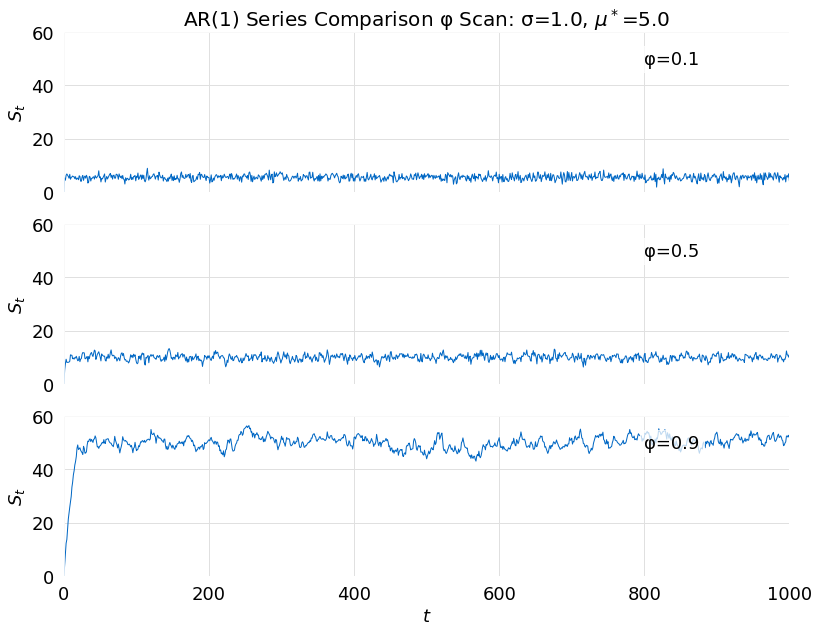

In [26]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [0.0, 60.0], title, *params)

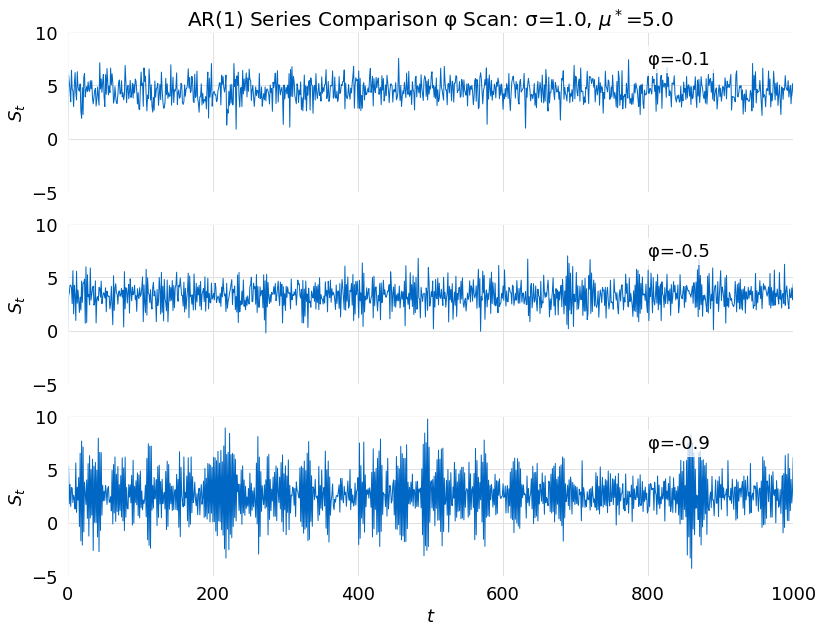

In [28]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [-5.0, 10.0], title, *params)

## Simulation $\mu^*$ Scan

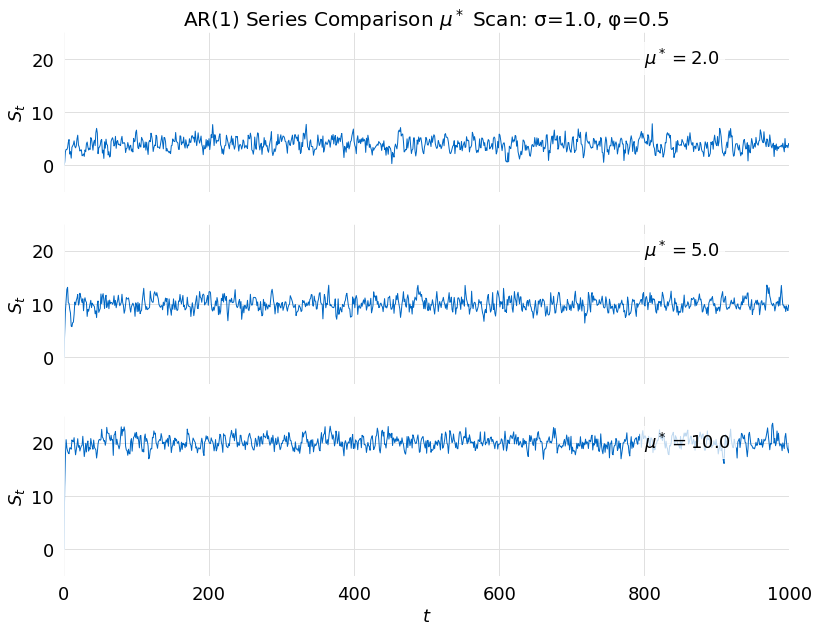

In [47]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [2.0, 5.0, 10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-5.0, 25.0], title, *params)

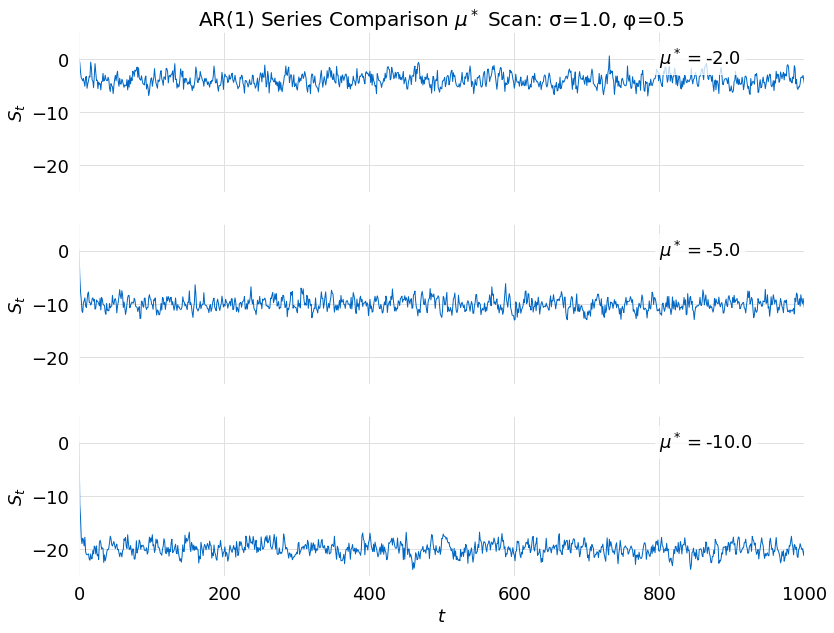

In [48]:
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [-2.0, -5.0, -10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-25.0, 5.0], title, *params)

## Mean

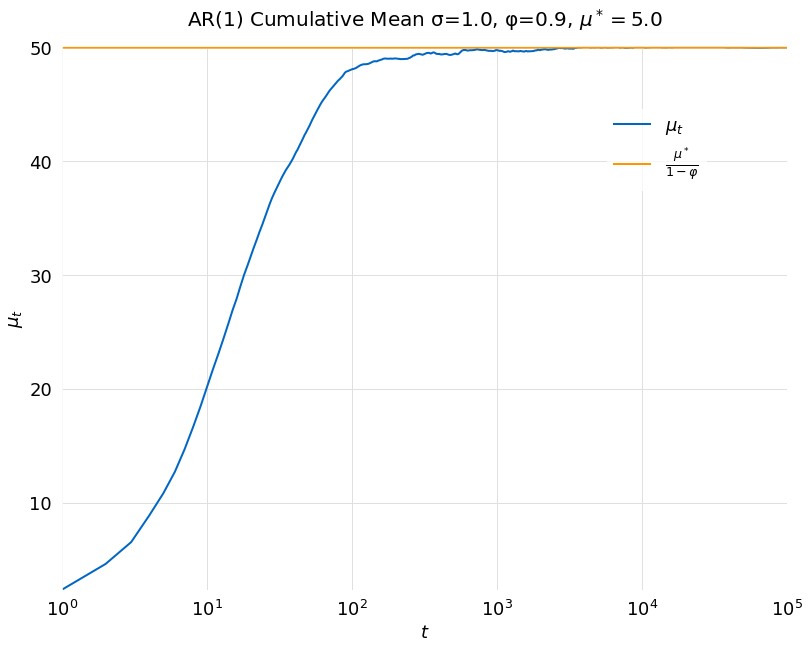

In [52]:
φ = 0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_mean_plot(φ, σ, μ, nsample, title)

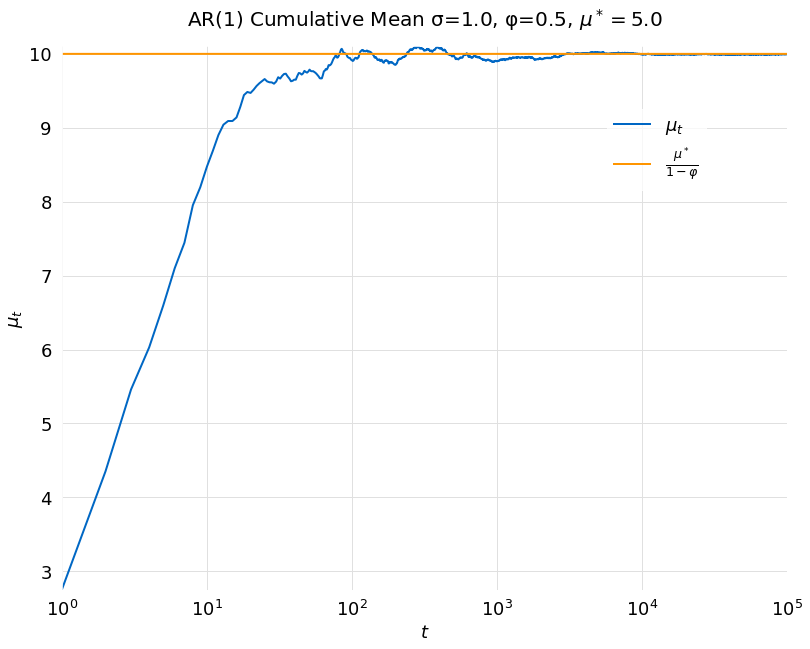

In [53]:
φ = 0.5
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_mean_plot(φ, σ, μ, nsample, title)

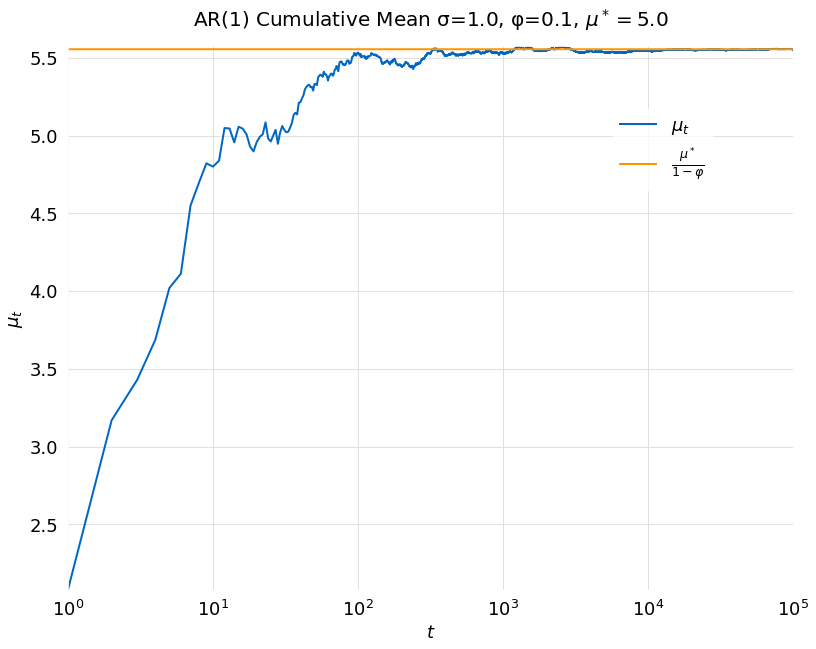

In [54]:
φ = 0.1
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_mean_plot(φ, σ, μ, nsample, title)

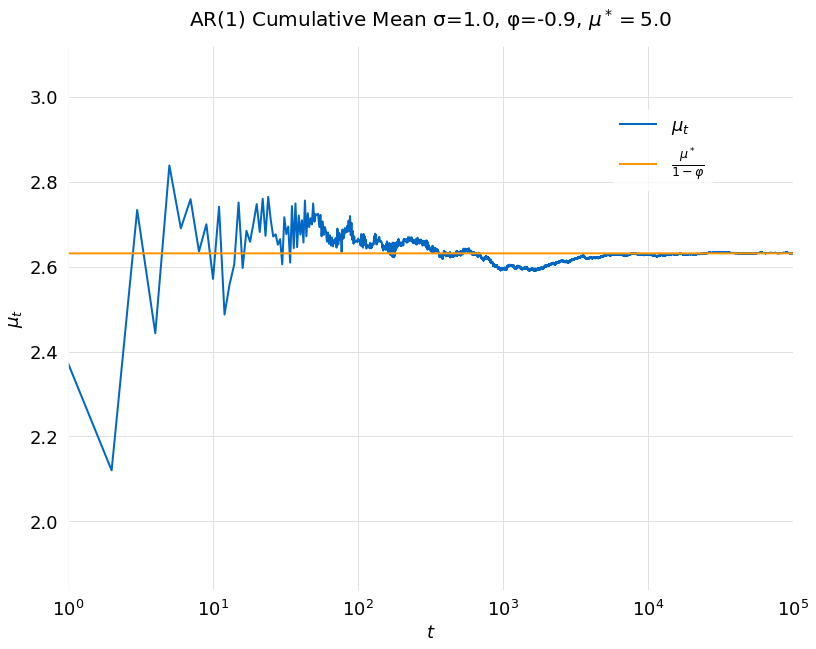

In [55]:
φ = -0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_mean_plot(φ, σ, μ, nsample, title)

## Standard Deviation

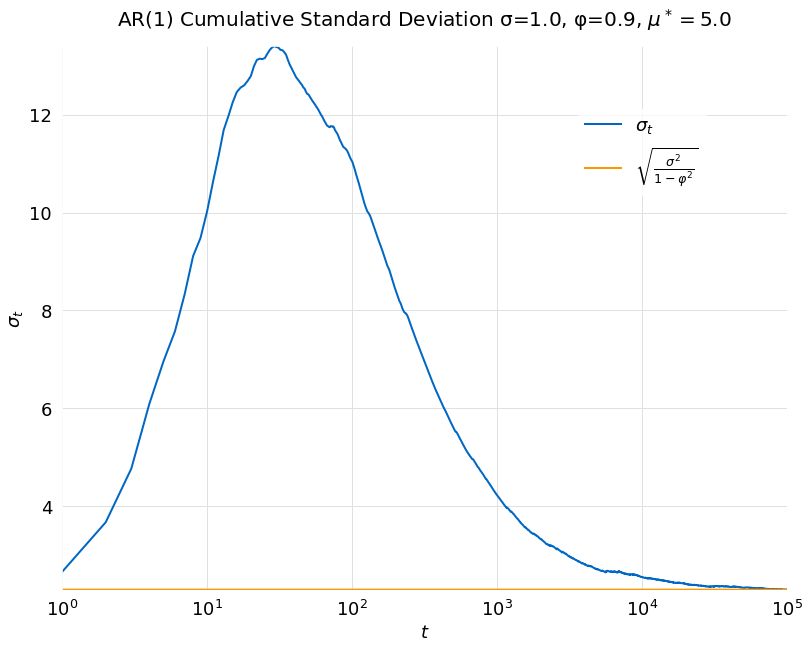

In [56]:
φ = 0.9
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_sd_plot(φ, σ, μ, nsample, title)

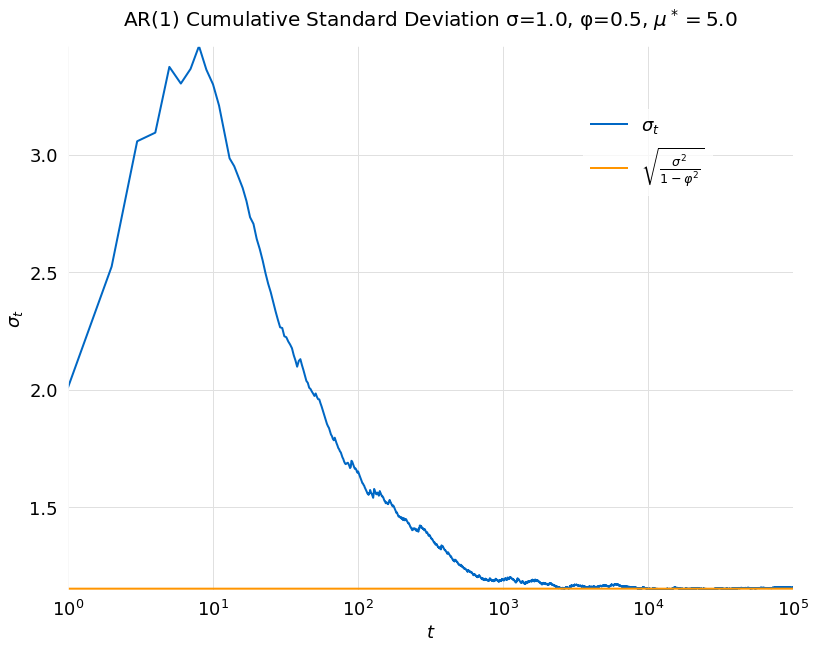

In [57]:
φ = 0.5
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_sd_plot(φ, σ, μ, nsample, title)

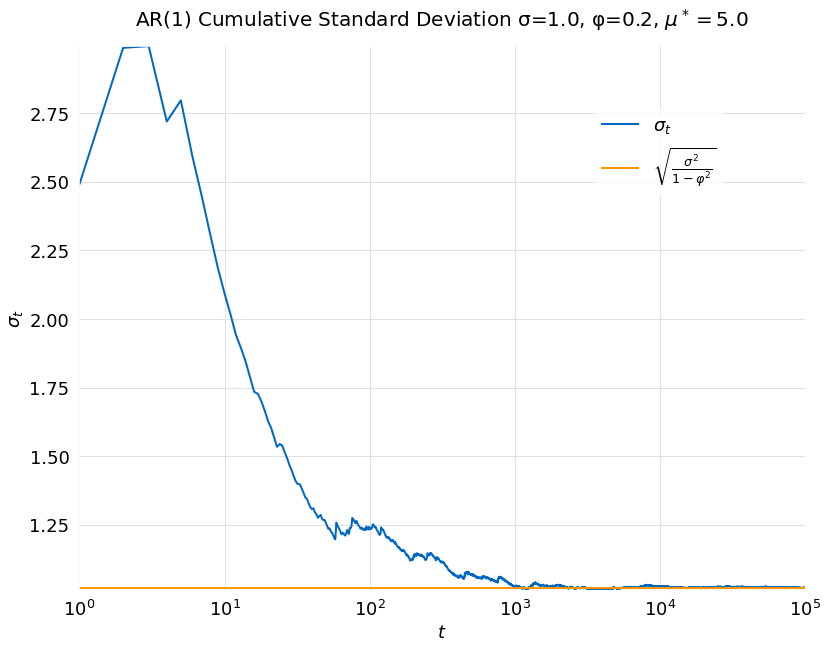

In [58]:
φ = 0.2
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_sd_plot(φ, σ, μ, nsample, title)

## Parameter Estimation

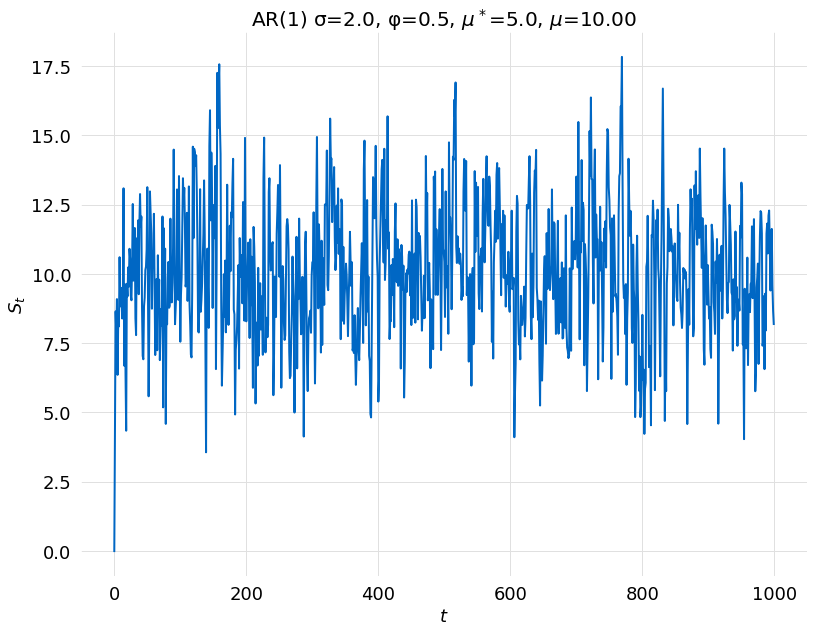

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*$=" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = arima.arp_offset([φ], μ, nsample, σ)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [15]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2131.963
Date:                Fri, 06 May 2022   AIC                           4269.926
Time:                        07:43:05   BIC                           4284.650
Sample:                             0   HQIC                          4275.522
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0773      0.128     78.843      0.000       9.827      10.328
ar.L1          0.5031      0.026     19.248      0.000       0.452       0.554
sigma2         4.1610      0.174     23.963      0.000       3.821       4.501
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.61   Prob(JB):                         0.11
Heteroskedasticity (H):               0.79   Skew:                            -0.04
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
df.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': [0.5], 'θ': [], 'σ': 2.0, 'μ': 5.0, 'γ': 0.0},
  'Description': 'ARIMA(1,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [10.077290187511947, 0.1278139734870356],
    'Parameters': [[0.5031118509672294, 0.02613856778321273]],
    'Sigma2': [4.160971152076296, 0.17364059998103326]}},
  'Tests': {}},
 'Date': '06/05/2022 07:43:04',
 'Name': 'ARMA-Simulation-fb50564a-f3dd-4bc2-8706-a778f7d12cda'}

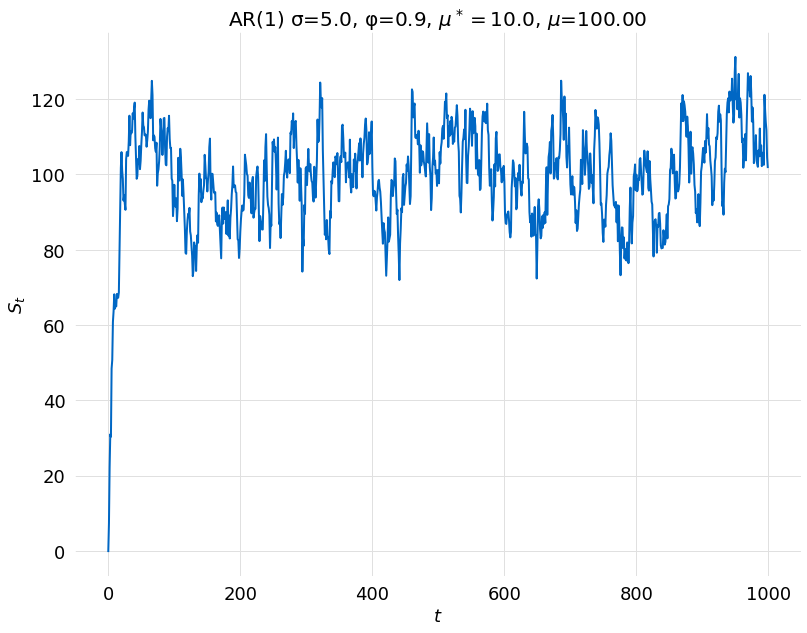

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = arima.arp_offset([φ], μ, nsample, σ)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [18]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3066.140
Date:                Fri, 06 May 2022   AIC                           6138.279
Time:                        07:43:05   BIC                           6153.002
Sample:                             0   HQIC                          6143.875
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.8674      2.759     35.466      0.000      92.459     103.276
ar.L1          0.9431      0.005    196.140      0.000       0.934       0.952
sigma2        26.9021      1.152     23.358      0.000      24.645      29.159
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):                86.07
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.13
Prob(H) (two-sided):                  0.23   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
df.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': [0.9], 'θ': [], 'σ': 5.0, 'μ': 10.0, 'γ': 0.0},
  'Description': 'ARIMA(1,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [97.86740370190508, 2.759471828396302],
    'Parameters': [[0.9430699646798651, 0.004808151391251768]],
    'Sigma2': [26.90214978688939, 1.1517286473268262]}},
  'Tests': {}},
 'Date': '06/05/2022 07:43:05',
 'Name': 'ARMA-Simulation-8ab112b5-4357-48d9-b383-024aca260319'}

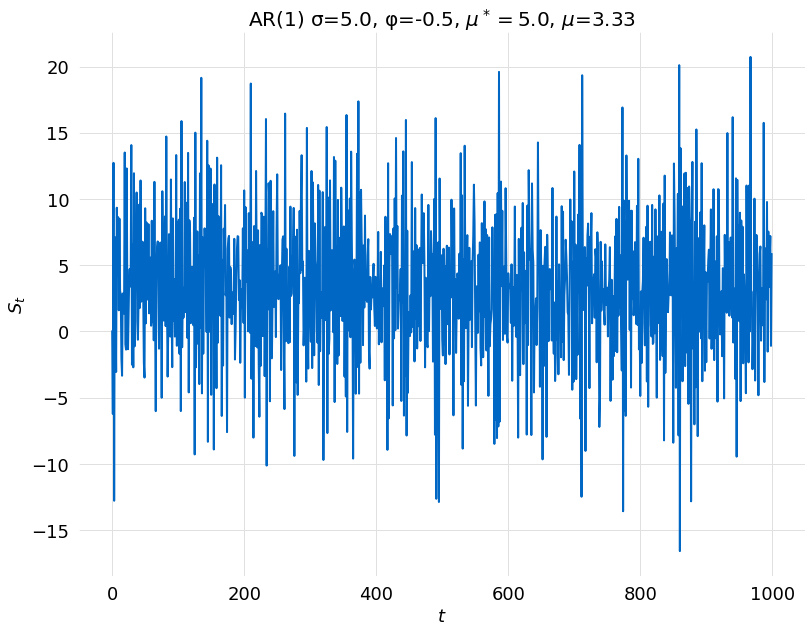

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = arima.arp_offset([φ], μ, nsample, σ)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [21]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2997.076
Date:                Fri, 06 May 2022   AIC                           6000.153
Time:                        07:43:05   BIC                           6014.876
Sample:                             0   HQIC                          6005.748
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3134      0.103     32.116      0.000       3.111       3.516
ar.L1         -0.4862      0.027    -18.261      0.000      -0.538      -0.434
sigma2        23.4766      1.042     22.534      0.000      21.435      25.518
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.93   Prob(JB):                         0.84
Heteroskedasticity (H):               0.98   Skew:                            -0.04
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': [-0.5], 'θ': [], 'σ': 5.0, 'μ': 5.0, 'γ': 0.0},
  'Description': 'ARIMA(1,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [3.3133553079452462, 0.1031689327236672],
    'Parameters': [[-0.48623637587564317, 0.02662689304695052]],
    'Sigma2': [23.4765742389866, 1.041814700052035]}},
  'Tests': {}},
 'Date': '06/05/2022 07:43:05',
 'Name': 'ARMA-Simulation-390e6e40-20c5-46a2-81ef-cd52df54bee7'}